# CISC 367 Midterm Final Notebook

<em> Ishaan Thakker </em>

### Introduction

If there is one thing that has increased dramatically during this pandemic, it is the increased exposure to the stock market for new investors. These new investors who sense a generational buying moment due to the pandemic do not have much background in this equity space.<sup>1</sup>  The four major online brokers - Charles Schwab, TD Ameritrade, ETrade, and Robinhood saw new accounts grow as much as 170% in the first quarter of 2020.<sup>2</sup>  Because of this, it is important for people to realize how to manage and mitigate risk when investing in the stock market. I plan to explore different stock tickers datasets to analyze the risk when investing in particular stocks.

### Project Overview

As the stock market is very evoleved and complex world, there are obviously many different areas in which analysis can be done and the questions that can be answered are limitless. I plan to do an analysis on a variety of companies in both the technological sector and other sectors in the market.

First some key terms:

* Stock: A security that represents the ownership of a fraction of a corporation. Units of stocks are called "shares".
* Volume: The amount of a security or asset that changes hands over some period of time, often over the course of a day.
* Volatility: The measure of the dispertion of returns for a particular stock. The higher the volatility, the more riskier the stock, vice-versa.
* Annual return: Return that an investment provides over a period of time, in this case, a year.
* Moving average: A simple technical analysis tool that smooths out price data by creating a constantly updated average price.

Being involved in the stock market requires alot of patience. Benjamin Graham, known as the “father of value investing,” knew the importance of patience in investing. Patience and investing are actually natural partners. Investing is a long-term prospect, the benefits of which typically come after many years. Note that there is a significant difference between **trading** stocks and **buying** stocks. This analysis will focus on buying stocks and their long term growth potential. If people can develop a basic understanding of risk analysis they will be in good hands when making investment decisions.

### Ethics

The ethical concerns relating to this problem are actually quite significant. First, people should never take anyones research and base it as their own when deciding to invest. It is important to learn key terms in the market before starting to invest. The research I will be doing only applies to my understand of stocks based on prior experience. That is not to say that people should not view my research it is simply to make sure each person does their own due diligence. Second, as I am sure most people are aware of the trading frenzy that went on with retail stocks such as GameStop (GME) it is **essential** that the market is never treated like a casino. Reddit fueled investing has spoiled the idea that stocks are an easy way to make "quick money". This is absolutely not how it works and my research will create a general idea of different terms and correlation between companies. I plan to look explore a little into these retail stocks which took over the market and explain how the risk in investing in them is far beyond than what the actual market brings.

### Questions

* How much value do we put at risk when investing in a particular company?
    * What can we learn from a particular stocks change in price over time?
    * What do moving average and daily return indicate about certain companies?
    * What is the correlation between daily returns of different stocks?
    * When choosing between two companies, how can one be deemed a better investment?

### Imports

In [2]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


#Apple 
AAPL = pd.read_csv("data/AAPL.csv")
#Microsoft 
MSFT = pd.read_csv("data/MSFT.csv")
#Tesla
TSLA = pd.read_csv("data/TSLA.csv")
#Nike
NKE = pd.read_csv("data/NKE.csv")
#Gamestop
GME = pd.read_csv("data/GME.csv")
#S&P 500
SP500 = pd.read_csv("data/constituents_csv.csv")

### Preparing Datasets

We can start out by preparing the individual stock data

In [4]:
AAPL.sort_values(by = ['Date'], inplace = True, ascending = False)
MSFT.sort_values(by = ['Date'], inplace = True, ascending = False)
TSLA.sort_values(by = ['Date'], inplace = True, ascending = False)
NKE.sort_values(by = ['Date'], inplace = True, ascending = False)
GME.sort_values(by = ['Date'], inplace = True, ascending = False)
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10162 entries, 10161 to 0
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10162 non-null  object 
 1   Open       10161 non-null  float64
 2   High       10161 non-null  float64
 3   Low        10161 non-null  float64
 4   Close      10161 non-null  float64
 5   Adj Close  10161 non-null  float64
 6   Volume     10161 non-null  float64
dtypes: float64(6), object(1)
memory usage: 635.1+ KB


In [28]:
sec_list = SP500["Sector"].unique()
print(len(sec_list))
sec_list

11


array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Discretionary', 'Utilities',
       'Financials', 'Materials', 'Real Estate', 'Consumer Staples',
       'Energy'], dtype=object)

In [6]:
AAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
10161,2021-04-01,123.660004,124.180000,122.489998,123.000000,123.000000,74957400.0
10160,2021-03-31,121.650002,123.519997,121.150002,122.150002,122.150002,118323800.0
10159,2021-03-30,120.110001,120.400002,118.860001,119.900002,119.900002,85671900.0
10158,2021-03-29,121.650002,122.580002,120.730003,121.389999,121.389999,80819200.0
10157,2021-03-26,120.349998,121.480003,118.919998,121.209999,121.209999,93958900.0


### What can we learn from a particular stocks change in price over time?

I will start out by plotting some companies data to see what we can interpret about the price of a stock since it has gone public.

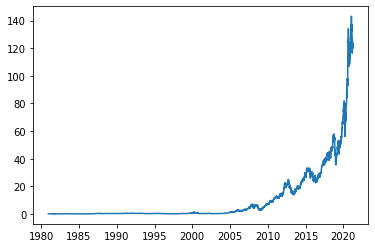

In [7]:
AAPL_price = AAPL.copy()
AAPL_price['Date'] = pd.to_datetime(AAPL_price['Date'], format = '%Y-%m-%d')
x = AAPL_price["Date"]
y = AAPL_price["Close"]
plt.plot(x,y)
plt.show()

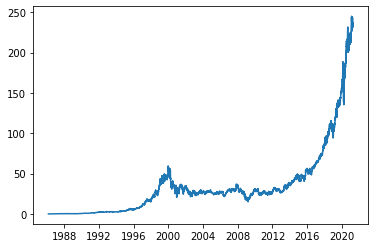

In [8]:
MSFT_price = MSFT.copy()
MSFT_price['Date'] = pd.to_datetime(MSFT_price['Date'], format = '%Y-%m-%d')
x = MSFT_price["Date"]
y = MSFT_price["Close"]
plt.plot(x,y)
plt.show()

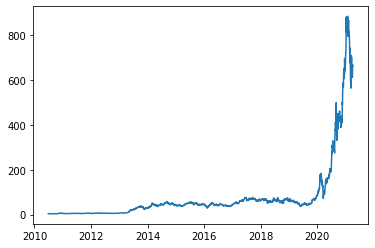

In [9]:
TSLA_price = TSLA.copy()
TSLA_price['Date'] = pd.to_datetime(TSLA_price['Date'], format = '%Y-%m-%d')
x =TSLA_price["Date"]
y = TSLA_price["Close"]
plt.plot(x,y)
plt.show()

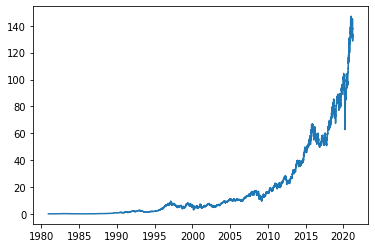

In [10]:
NKE_price = NKE.copy()
NKE_price['Date'] = pd.to_datetime(NKE_price['Date'], format = '%Y-%m-%d')
x = NKE_price["Date"]
y = NKE_price["Close"]
plt.plot(x,y)
plt.show()

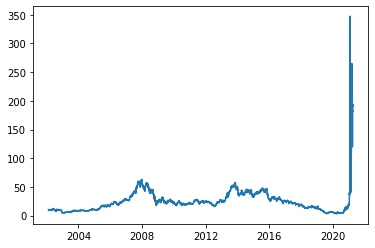

In [11]:
GME_price = GME.copy()
GME_price['Date'] = pd.to_datetime(GME_price['Date'], format = '%Y-%m-%d')
x = GME_price["Date"]
y = GME_price["Close"]
plt.plot(x,y)
plt.show()

Analysis:
From these five stock we can see how some stocks have a more of a steady exponential growth while others such as TSLA and GME have a more rapid growth. This all depends on the fundamentals of the companies and how they are affected by factors such as growth in technology.

* Similar trends are appearing where as time goes the return a stock brings will be positive, barring any crisis.
* But this does not tell us about risk
    * For risk analysis we should look into a shorter time frame. Lets choose this past year since it is a great example of the movement of the market due to the pandemic.

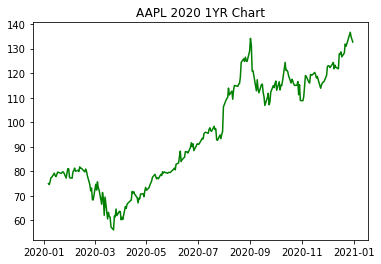

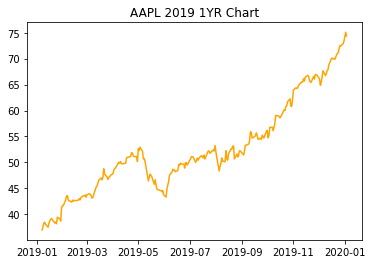

In [30]:
AAPL_short = AAPL.copy()
AAPL_short['Date'] = pd.to_datetime(AAPL_short['Date'], format = '%Y-%m-%d')
filtered = AAPL_short[(AAPL_short['Date'] > '2020-01-04') & (AAPL_short['Date'] < '2021-01-04')]
x = filtered['Date']
y = filtered['Close']
plt.plot(x,y, color = "Green")
plt.title('AAPL 2020 1YR Chart')
plt.show()

filtered2 = AAPL_short[(AAPL_short['Date'] > '2019-01-04') & (AAPL_short['Date'] < '2020-01-04')]
x = filtered2['Date']
y = filtered2['Close']
plt.plot(x,y, color = "Orange")
plt.title('AAPL 2019 1YR Chart')
plt.show()

An important thing to realize, this past year was way volaitle than most, in 2019 there was not alot of movement in the market besides for a minor selloff in June. This shows how real life events such as the pandemic play a huge part in the market. The massive run-up that was experienced from July 2019 to March 2021 was drastically decreased around the time quarentine began. But it can also be seen that it did not take long for the market to recover. A smart investor would have compared the data from the previous years and decided that March 2020 was a great buying opportunity. But since AAPL is a very fundamentally strong stock it did not experience the type of selloff that other companies in the airline and retail industry experienced.

### What do moving average and daily return indicate about certain companies?

<AxesSubplot:>

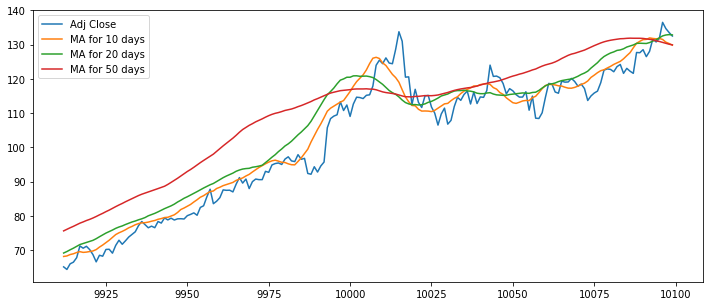

In [13]:
#Moving average calculations
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window = ma, center = False).mean()
AAPL.head(50)

#Filtering data and plotting moving averages
filtered = AAPL[(AAPL['Date'] > '2020-04-04') & (AAPL['Date'] < '2021-01-04')]
filtered[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (12,5))

This graph shows that after the March lows of the market, the moving averages follow a nice pattern for the rest of the year. The moving average technical indicator smooths out price trends by filtering out the “noise” from random short-term price fluctuations. When asset prices cross over their moving averages, it may generate a trading signal for technical traders. [More on moving averages](https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp)

In [14]:
#Daily Return Calculations
#Calculated by taking percent change over adjusted close prices
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].head()

10161         NaN
10160   -0.006911
10159   -0.018420
10158    0.012427
10157   -0.001483
Name: Daily Return, dtype: float64

<AxesSubplot:>

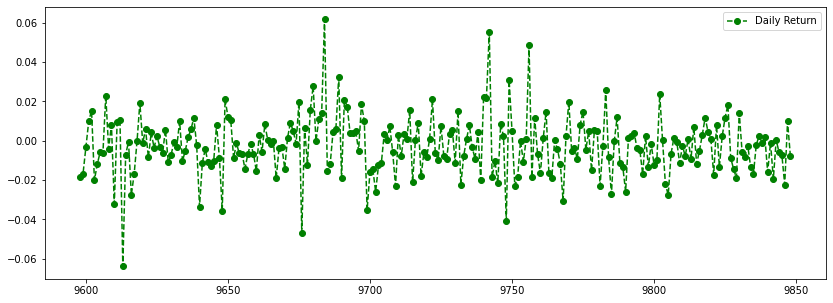

In [16]:
#Displaying daily return

AAPL['Date'] = pd.to_datetime(AAPL['Date'], format = '%Y-%m-%d')
filtered = AAPL[(AAPL['Date'] > '2019-01-04') & (AAPL['Date'] < '2020-01-04')]
filtered['Daily Return'].plot(figsize = (14,5), legend = True, linestyle = '--', marker = 'o', color = 'green')

c:\users\13023\cisc367-projects\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

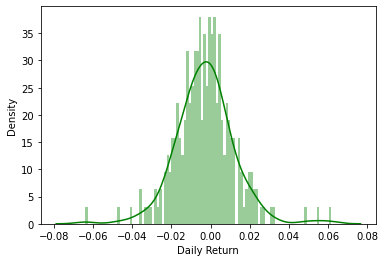

In [17]:
sns.distplot(filtered['Daily Return'].dropna(), bins = 100, color = 'green')

Stock prices change on a daily basis, altering the value of your investments. You may calculate daily stock returns to monitor the magnitude of this change. The daily return measures the dollar change in a stock’s price as a percentage of the previous day’s closing price. A positive return means the stock has grown in value, while a negative return means it has lost value. A stock with lower positive and negative daily returns is typically less risky than a stock with higher daily returns, which create larger swings in value. In this graph positive returns are more frequent than negative returns which is a good sign when choosing a stock.

### What is the correlation between daily returns of different stocks?

Now that we have analysis on daily returns for one stock it is time to select a few different ones and see what we can learn from it.

In [18]:
#Variety of different companies which are part of different sectors for the most part (besides AAPL and MSFT)
names= ['AAPL', 'MSFT', 'TSLA', "NKE", "GME"]
frames = [frame.copy() for frame in [AAPL, MSFT, TSLA, NKE, GME]]
for frame in frames[1:]:
    frame['Date'] = pd.to_datetime(frame['Date'], format = '%Y-%m-%d')
    frame[(frame['Date'] > '2019-01-04') & (frame['Date'] < '2020-01-04')]
for name, frame in zip(names, frames):
    frame["Name"] = name
    frame['Adj Close'] = frame['Adj Close'].fillna(0)
data = pd.concat(frames)
pivoted = data.pivot_table(index=['Date'], columns=['Name'], values='Adj Close')
pivoted.tail()

Name,AAPL,GME,MSFT,NKE,TSLA
Date,,,,,
2021-03-26,121.209999,181.000000,236.479996,132.990005,618.710022
2021-03-29,121.389999,181.300003,235.240005,133.490005,611.289978
2021-03-30,119.900002,194.460007,231.850006,132.949997,635.619995
2021-03-31,122.150002,189.820007,235.770004,132.889999,667.929993
2021-04-01,123.000000,191.449997,242.350006,132.529999,661.750000


Converting this data to find the daily returns of the stocks we selected.

In [20]:
#Calculate daily return for each company
stocks_dr = pivoted.pct_change()
stocks_dr.tail()

Name,AAPL,GME,MSFT,NKE,TSLA
Date,,,,,
2021-03-26,0.005141,-0.014966,0.017819,0.033815,-0.033854
2021-03-29,0.001485,0.001657,-0.005244,0.003760,-0.011993
2021-03-30,-0.012274,0.072587,-0.014411,-0.004045,0.039801
2021-03-31,0.018766,-0.023861,0.016907,-0.000451,0.050832
2021-04-01,0.006959,0.008587,0.027909,-0.002709,-0.009252


Lets compare two tech stocks APPL and MSFT to see their daily return correlation

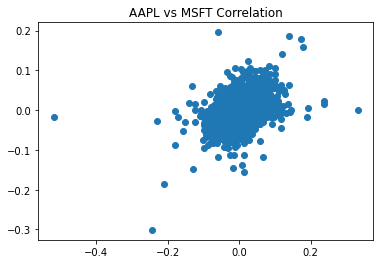

In [23]:
plt.scatter(x = stocks_dr['AAPL'], y = stocks_dr['MSFT'])
plt.title("AAPL vs MSFT Correlation")
plt.show()

As we can see, these seems to be a little correlation between the two stocks, this is probably due to the fact that they are in the same sector of the market. So similar factors will influence their rise and fall.

What about if we look at the other combinations of stocks from our list?

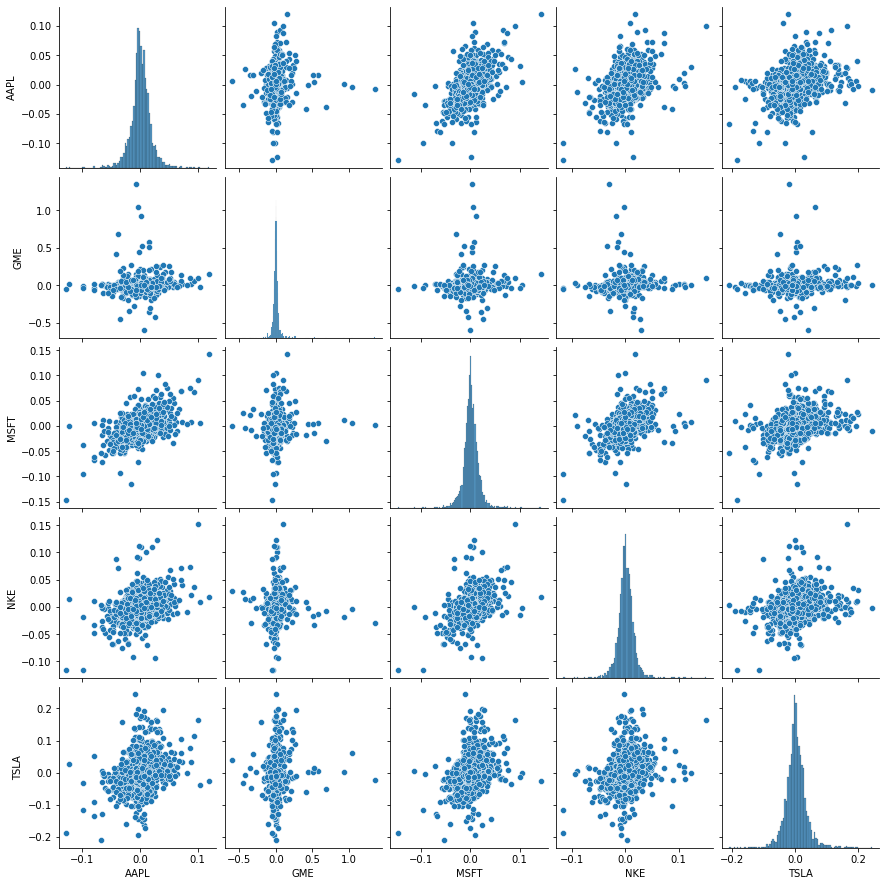

In [33]:
sns.pairplot(stocks_dr.dropna())

As we would expect the correlation between the same stocks is perfect but we can also see how other companies relate to each other. Stocks in different sectors (NKE and TSLA) will not be correlated but others which are related will have more of a correlation (AAPL and MSFT).

### How much value do we put at risk by investing in a particular company?

Value at Risk: The amont of money we could expect to lose for a given confidence interval. 
Using the Bootstrap Method to fine this would be the best choice.

**Bootstrap Method**

c:\users\13023\cisc367-projects\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

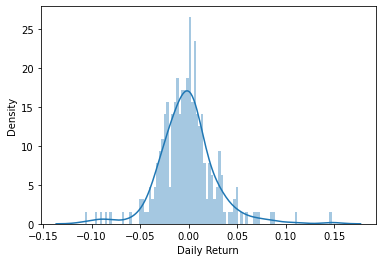

In [36]:
AAPL['Date'] = pd.to_datetime(AAPL['Date'], format = '%Y-%m-%d')
filtered = AAPL[(AAPL['Date'] > '2020-01-04') & (AAPL['Date'] < '2021-01-04')]
sns.distplot(filtered['Daily Return'].dropna(), bins = 100)

In [37]:
stocks_dr['AAPL'].quantile(0.05)

-0.041662710094008126

What this number indicates is that we have 95% confidence that our worst daily loss will not exceed 4.17% of the investment.

Compared to a stock like GameStop:

c:\users\13023\cisc367-projects\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

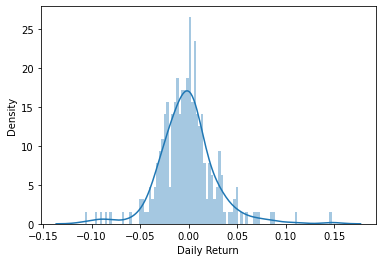

In [39]:
GME['Daily Return'] = GME['Adj Close'].pct_change()
GME['Date'] = pd.to_datetime(GME['Date'], format = '%Y-%m-%d')
filtered_GME = GME[(GME['Date'] > '2020-06-04') & (GME['Date'] < '2021-03-04')]
sns.distplot(filtered['Daily Return'].dropna(), bins = 100)

In [40]:
filtered_GME['Daily Return'].quantile(0.05)

-0.19013355776925414

As we can see, this is a much larger than for a stock like AAPL, meaning that it is more riskier and volatile.

Lets take other companies and see how they fair:

In [42]:
#Microsoft
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()
MSFT['Date'] = pd.to_datetime(MSFT['Date'], format = '%Y-%m-%d')
filtered_MSFT = MSFT[(MSFT['Date'] > '2020-06-04') & (MSFT['Date'] < '2021-03-04')]
filtered_MSFT['Daily Return'].quantile(0.05)

-0.027475673993260074

In [43]:
#Tesla
TSLA['Daily Return'] = TSLA['Adj Close'].pct_change()
TSLA['Date'] = pd.to_datetime(TSLA['Date'], format = '%Y-%m-%d')
filtered_TSLA = TSLA[(TSLA['Date'] > '2020-06-04') & (TSLA['Date'] < '2021-03-04')]
filtered_TSLA['Daily Return'].quantile(0.05)

-0.08151186849145153

In [44]:
#Nike
NKE['Daily Return'] = NKE['Adj Close'].pct_change()
NKE['Date'] = pd.to_datetime(NKE['Date'], format = '%Y-%m-%d')
filtered_NKE = NKE[(NKE['Date'] > '2020-06-04') & (NKE['Date'] < '2021-03-04')]
filtered_NKE['Daily Return'].quantile(0.05)

-0.027386049709108184

### Conclusion:

In conclusion, the results of analysis show that when looking at a certain stocks change in price over time, values such as moving average and daily return we, correlation between daily returns, and overall risk management, an investor will be able to make a good decision on whether or not the stock is deemed buyable. It is also important to remember to compare a stock to others in it's sector or other competitors to get a good idea on how it performs in relation to others.

### References

<sup>1</sup> 
[Young investors pile into stocks, seeing ‘generational-buying moment’ instead of risk](https://www.cnbc.com/2020/05/12/young-investors-pile-into-stocks-seeing-generational-buying-moment-instead-of-risk.html)

<sup>2</sup>
[How Robinhood and Covid opened the floodgates for 13 million amateur stock traders](https://www.researchgate.net/publication/215652750_Global_Climate_Change_A_cause_of_concern)